<a href="https://colab.research.google.com/github/Nagarjun-07/SPELL-B/blob/main/Autism_Netx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from google.colab import files
import matplotlib.pyplot as plt

# Upload the dataset (this works in Colab)
uploaded = files.upload()
data = pd.read_csv(list(uploaded.keys())[0])
print(data.head())

Saving autism.csv to autism (2).csv
   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation C

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 2 to 929
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               701 non-null    int64  
 1   A1_Score         701 non-null    int64  
 2   A2_Score         701 non-null    int64  
 3   A3_Score         701 non-null    int64  
 4   A4_Score         701 non-null    int64  
 5   A5_Score         701 non-null    int64  
 6   A6_Score         701 non-null    int64  
 7   A7_Score         701 non-null    int64  
 8   A8_Score         701 non-null    int64  
 9   A9_Score         701 non-null    int64  
 10  A10_Score        701 non-null    int64  
 11  age              701 non-null    float64
 12  gender           701 non-null    int64  
 13  ethnicity        701 non-null    int64  
 14  jaundice         701 non-null    int64  
 15  austim           701 non-null    int64  
 16  contry_of_res    701 non-null    object 
 17  used_app_before  701 

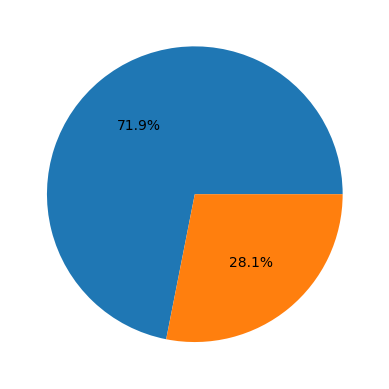

In [ ]:
data.shape
data.info()
data['relation'].value_counts()
plt.pie(data['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()
# Data Preprocessing
def preprocess_data(df):
    df.replace('?', np.nan, inplace=True)
    df.dropna(subset=['gender', 'ethnicity'], inplace=True)
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])
    df['ethnicity'] = le.fit_transform(df['ethnicity'])
    df['jaundice'] = le.fit_transform(df['jaundice'])
    df['austim'] = le.fit_transform(df['austim'])
    df['used_app_before'] = le.fit_transform(df['used_app_before'])
    df['relation'] = le.fit_transform(df['relation'].fillna('Self'))
    X = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
            'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
            'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'used_app_before']].values
    y = df['Class/ASD'].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y, scaler

X, y, scaler = preprocess_data(data)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,701.0,465.801712,269.460528,3.000000,233.000000,461.000000,699.000000,930.000000
A1_Score,701.0,0.626248,0.484144,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,701.0,0.590585,0.492077,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,701.0,0.517832,0.500039,0.000000,0.000000,1.000000,1.000000,1.000000
A4_Score,701.0,0.467903,0.499325,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,701.0,0.453638,0.498201,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,701.0,0.356633,0.479347,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,701.0,0.460770,0.498815,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,701.0,0.547789,0.498066,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,701.0,0.542083,0.498582,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
data['ethnicity'].value_counts()

,count
ethnicity,
10,301
5,97
0,84
1,64
8,38
7,33
6,33
3,18
4,15


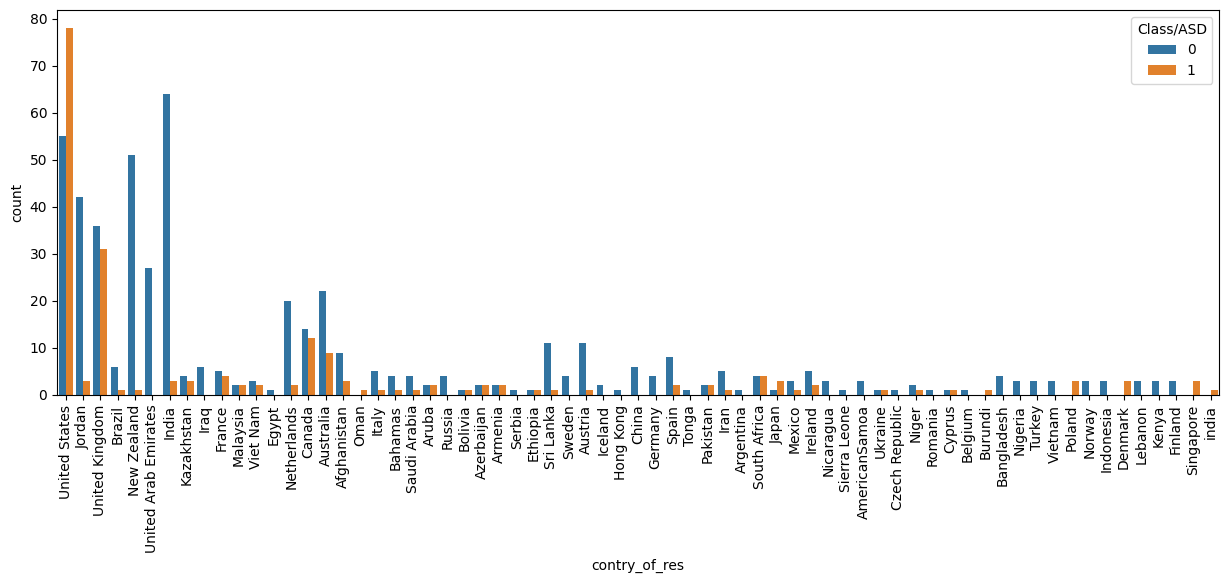

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(15,5))
sb.countplot(data=data, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()


In [ ]:
ints = []
objects = []
floats = []

for col in data.columns:
  if data[col].dtype == int:
    ints.append(col)
  elif data[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)


Skipping subplot for column 'ID' as it has no data.
Skipping subplot for column 'Class/ASD' as it has no data.


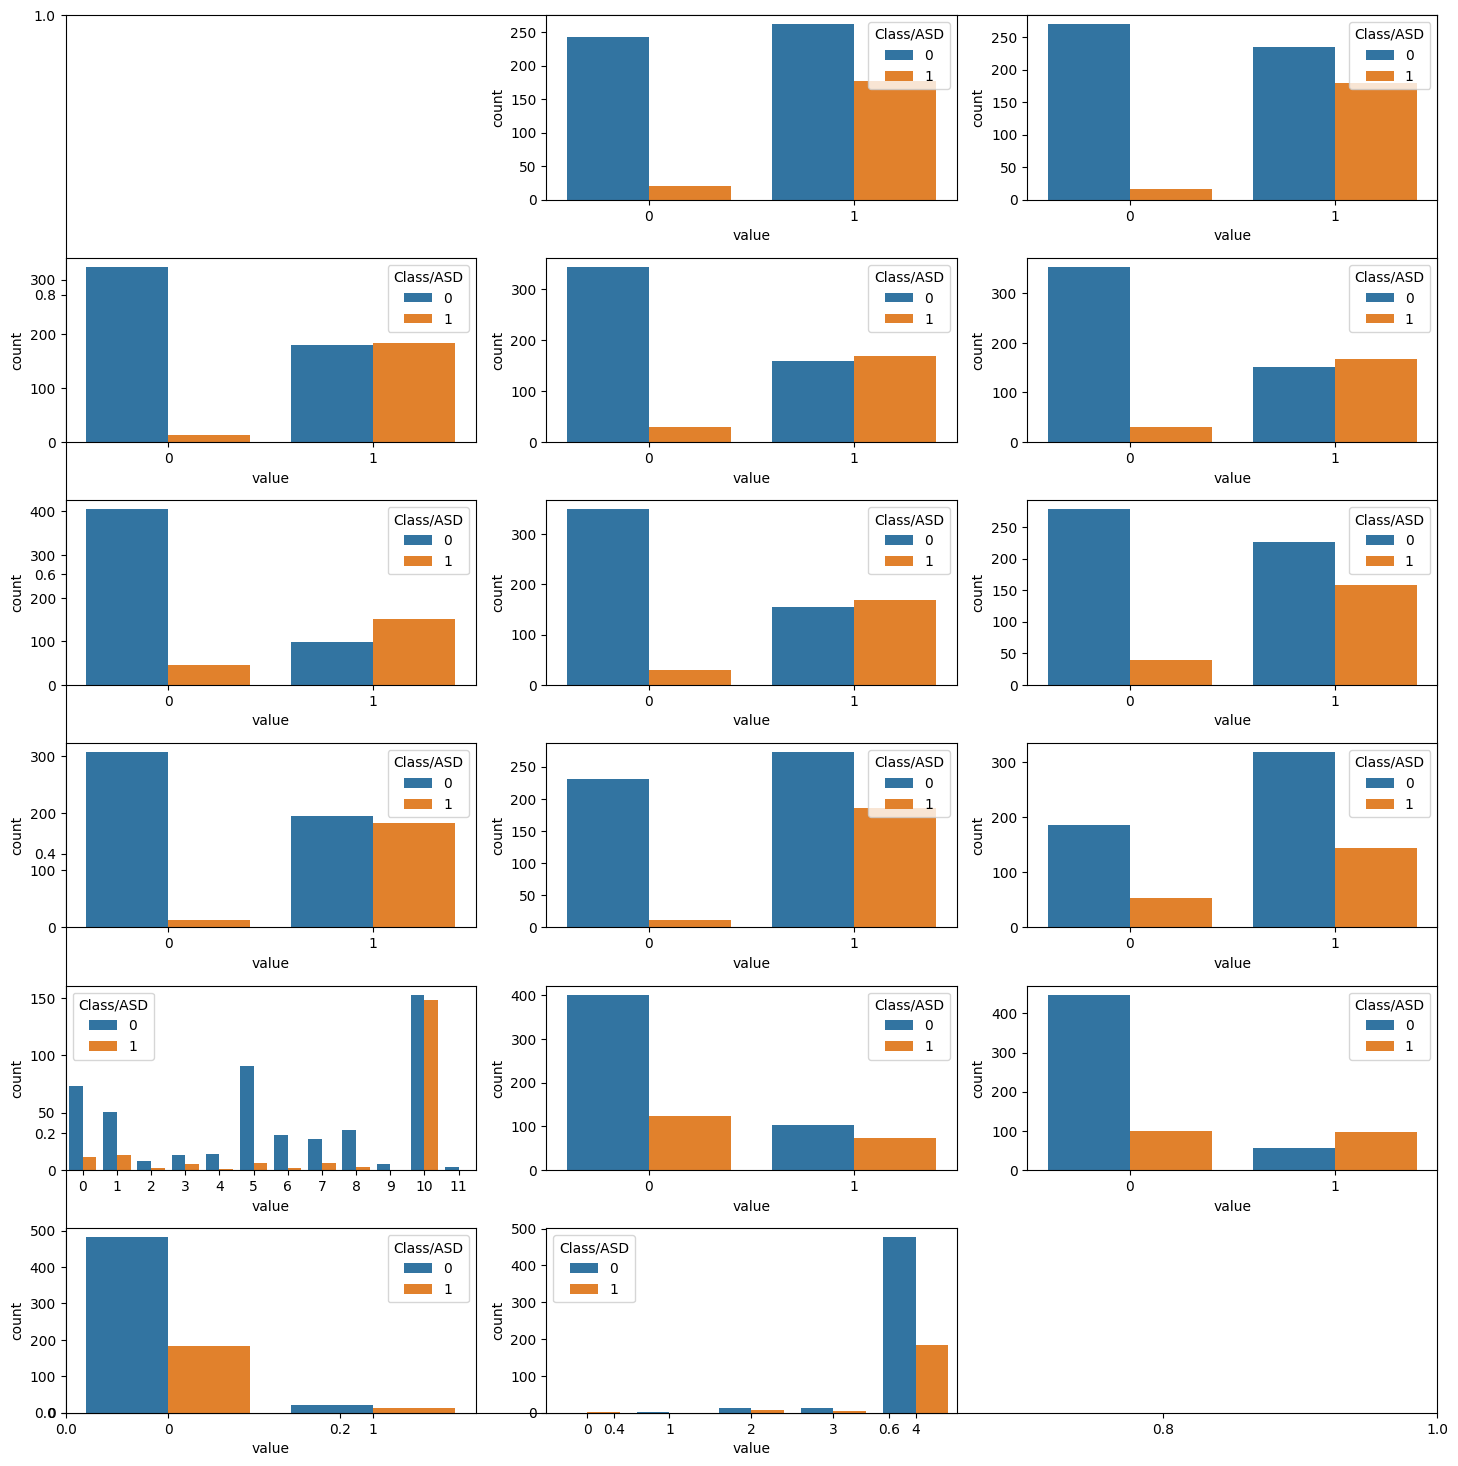

In [ ]:
# Convert the data to long-form using melt
df_melted = data.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

# Adjust subplot grid dimensions to accommodate 18 plots (e.g., 6 rows x 3 columns)
for i, col in enumerate(ints):
  # Filter data for the current subplot based on the 'col' value
  subplot_data = df_melted[df_melted['col'] == col]

  # Check if the subplot_data is empty
  if subplot_data.empty:
    print(f"Skipping subplot for column '{col}' as it has no data.")
    continue  # Skip to the next iteration if empty

  plt.subplot(6,3,i+1)  # Changed to 6 rows, 3 columns
  # Use the melted DataFrame and specify x and hue
  sb.countplot(x='value', hue='Class/ASD', data=subplot_data)

plt.tight_layout()
plt.show()

# This code is modified by Susobhan Akhuli

<ipython-input-87-66a62b3dec02>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
<ipython-input-87-66a62b3dec02>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])


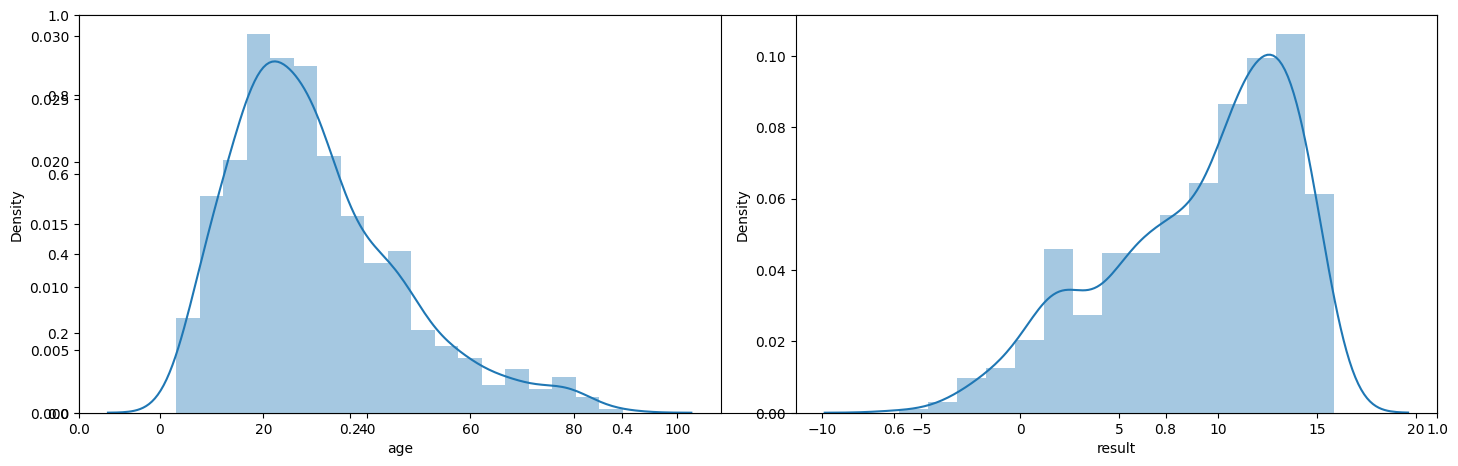

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(data[col])
plt.tight_layout()
plt.show()


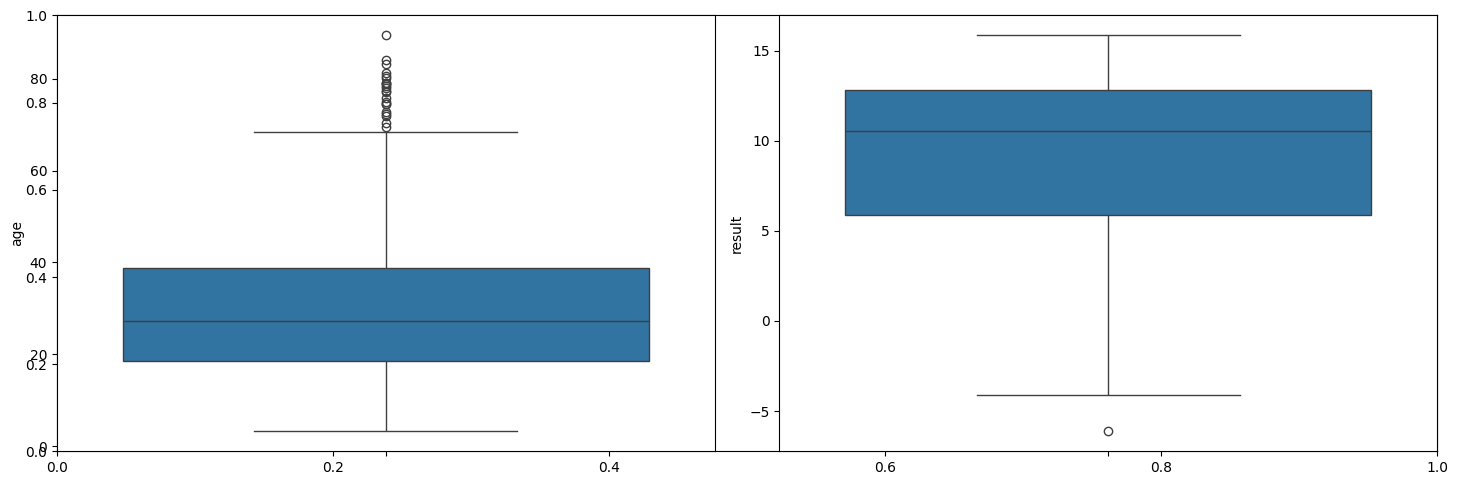

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(data[col])
plt.tight_layout()
plt.show()


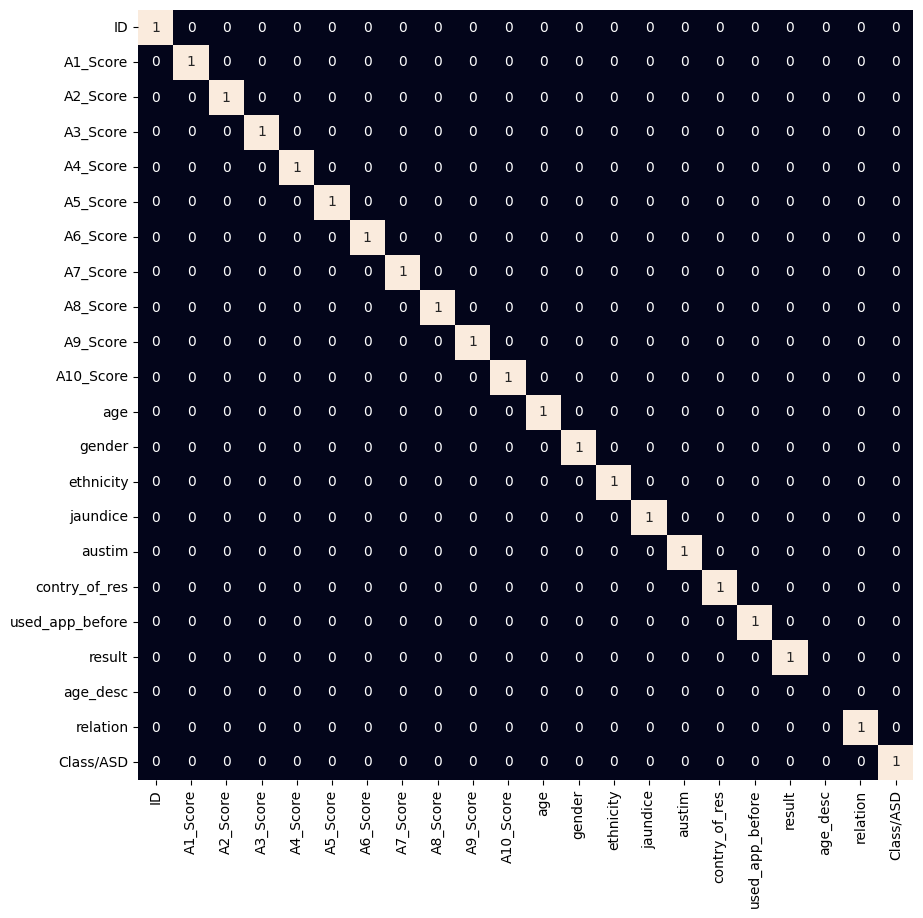

In [ ]:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

data = encode_labels(data)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(data.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [ ]:
# Enhanced Data Augmentation
def augment_data(X, y, num_samples=1000):
    np.random.seed(42)
    augmented_X = []
    augmented_y = []

    for _ in range(num_samples):
        # Randomly select two samples for mixup
        idx1, idx2 = np.random.choice(len(X), 2, replace=False)
        x1, x2 = X[idx1], X[idx2]
        y1, y2 = y[idx1], y[idx2]

        # Mixup: sample lambda from Beta distribution
        lam = np.random.beta(0.2, 0.2)
        x_new = lam * x1 + (1 - lam) * x2
        y_new = y1 if lam > 0.5 else y2  # choose majority label

        # Perturb A1-A10 scores (binary features, indices 0-9)
        for i in range(10):
            if np.random.rand() < 0.05:  # 5% chance to flip
                x_new[i] = 1 - x_new[i] if x_new[i] in [0, 1] else np.clip(np.round(x_new[i]), 0, 1)

        # Perturb age (index 10) with Gaussian noise
        x_new[10] += np.random.normal(0, 0.1)
        x_new[10] = np.clip(x_new[10], -2, 2)  # Assuming standardized range

        # Ensure categorical features (indices 11-15) remain valid (round to nearest integer)
        for i in range(11, 16):
            x_new[i] = np.round(x_new[i]).astype(int)

        augmented_X.append(x_new)
        augmented_y.append(y_new)

    return np.vstack([X, augmented_X]), np.hstack([y, augmented_y])


In [ ]:

# Apply SMOTE and Augmentation
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_aug, y_aug = augment_data(X_smote, y_smote, num_samples=2000)  # Generate 2000 augmented samples



In [ ]:
# Define Enhanced AutismNetX with improvements
class AutismNetX(tf.keras.Model):
    def __init__(self, input_shape):
        super(AutismNetX, self).__init__()
        # Uncertainty variable for loss calculation
        self.log_var = tf.Variable(0.0, trainable=True, name='log_var')

        # Attention branch (apply multi-head attention on expanded dims)
        self.attention = layers.MultiHeadAttention(num_heads=8, key_dim=32)
        self.attention_flatten = layers.Flatten()
        self.multiply = layers.Multiply()

        # Temporal branch: first 10 features processed via bidirectional LSTM
        self.reshape_temporal = layers.Reshape((10, 1))
        self.lstm = layers.Bidirectional(layers.LSTM(512, return_sequences=False))  # increased units

        # Spatial branch: remaining 6 features processed via Conv1D layers
        self.reshape_spatial = layers.Reshape((6, 1))
        self.conv1d = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')
        self.conv1d_2 = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')
        self.global_pool = layers.GlobalMaxPooling1D()
        self.concat = layers.Concatenate()

        # Additional dense layer block before main dense layers
        self.dense0 = layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))
        self.bn0 = layers.BatchNormalization()
        self.dropout0 = layers.Dropout(0.5)

        # Main dense block with residual connection
        self.dense1 = layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.02))
        self.bn1 = layers.BatchNormalization()
        self.dropout1 = layers.Dropout(0.4)
        self.dense2 = layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.02))
        self.bn2 = layers.BatchNormalization()
        self.dropout2 = layers.Dropout(0.3)
        self.residual_dense = layers.Dense(256, activation='relu')
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs, training=False):
        # Apply attention: expand dims to (batch, features, 1)
        attn_output = self.attention(inputs[:, :, tf.newaxis], inputs[:, :, tf.newaxis])
        attn_output = self.attention_flatten(attn_output)
        attended_inputs = self.multiply([inputs, attn_output])

        # Split attended inputs into temporal and spatial parts
        temporal = attended_inputs[:, :10]
        temporal = self.reshape_temporal(temporal)
        temporal = self.lstm(temporal)

        spatial = attended_inputs[:, 10:]
        spatial = self.reshape_spatial(spatial)
        spatial = self.conv1d(spatial)
        spatial = self.conv1d_2(spatial)
        spatial = self.global_pool(spatial)

        combined = self.concat([temporal, spatial])

        # Additional dense block
        x = self.dense0(combined)
        x = self.bn0(x, training=training)
        if training:
            x = self.dropout0(x)

        # Main dense block with residual connection
        y1 = self.dense1(x)
        y1 = self.bn1(y1, training=training)
        if training:
            y1 = self.dropout1(y1)
        residual = self.residual_dense(x)
        y2 = self.dense2(y1)
        y2 = self.bn2(y2, training=training)
        y2 = y2 + residual
        if training:
            y2 = self.dropout2(y2)
        outputs = self.output_layer(y2)
        return outputs

    def uncertainty_aware_loss(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        precision = tf.exp(-self.log_var)
        base_loss = tf.reduce_mean(precision * tf.square(y_true - y_pred) + self.log_var)
        reg_loss = 0.05 * tf.square(self.log_var)
        return base_loss + reg_loss

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_aug, y_aug)):
    print(f"Fold {fold + 1}/5")
    X_train_fold, X_val_fold = X_aug[train_idx], X_aug[val_idx]
    y_train_fold, y_val_fold = y_aug[train_idx], y_aug[val_idx]

    # Build and compile the model (ensure to pass the input shape)
    model = AutismNetX(input_shape=(X_train_fold.shape[1],))
    initial_learning_rate = 0.001
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, decay_steps=2000, decay_rate=0.8)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss=model.uncertainty_aware_loss, metrics=['accuracy'])

    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15,
                                                      restore_best_weights=True)



Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Epoch 1/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 63s 169ms/step - accuracy: 0.6873 - loss: 11.8923 - val_accuracy: 0.8070 - val_loss: 0.6459
Epoch 2/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 80s 165ms/step - accuracy: 0.8196 - loss: 0.4860 - val_accuracy: 0.7671 - val_loss: 0.3220
Epoch 3/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.8128 - loss: 0.2860 - val_accuracy: 0.8136 - val_loss: 0.2443
Epoch 4/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 87s 182ms/step - accuracy: 0.8056 - loss: 0.2862 - val_accuracy: 0.7304 - val_loss: 0.3265
Epoch 5/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 77s 167ms/step - accuracy: 0.8266 - loss: 0.2605 - val_accuracy: 0.8053 - val_loss: 0.2308
Epoch 6/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.8233 - loss: 0.2334 - val_accuracy: 0.4925 - val_loss: 0.4614
Epoch 7/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 50s 165ms/step - accuracy: 0.8093 - loss: 0.2462 - val_accuracy: 0.8136 - val_loss: 0.2210
Epoch 8/100
301/301 ━━━━━━━━━━━━━━━━━━━━ 49s 164ms/step - accuracy: 0.8304 

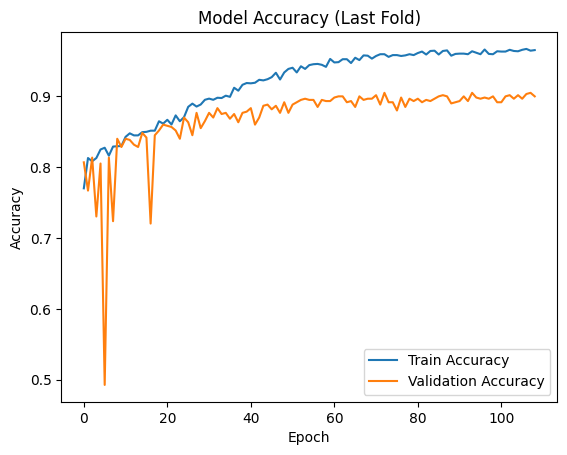

In [ ]:
    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=8,
                        validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=1)

    # Pruning and Fine-Tuning Step: prune 1% of dense1 weights
    weights = model.dense1.get_weights()
    mask = np.abs(weights[0]) > np.percentile(np.abs(weights[0]), 1)
    weights[0] *= mask
    model.dense1.set_weights(weights)

    model.compile(optimizer=optimizer, loss=model.uncertainty_aware_loss, metrics=['accuracy'])
    history_fine = model.fit(X_train_fold, y_train_fold, epochs=25, batch_size=8,
                             validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=1)

    # Evaluate on validation fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    accuracies.append(val_accuracy)
    print(f"Fold {fold + 1} Accuracy: {val_accuracy * 100:.2f}%")

# Final Cross-Validation Results
mean_accuracy = np.mean(accuracies)
print(f"Mean Cross-Validation Accuracy: {mean_accuracy * 100:.2f}%")

# Plot training history for the last fold (combined initial and fine-tuning phases)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy (Last Fold)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<ipython-input-98-898cd36b3e7a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


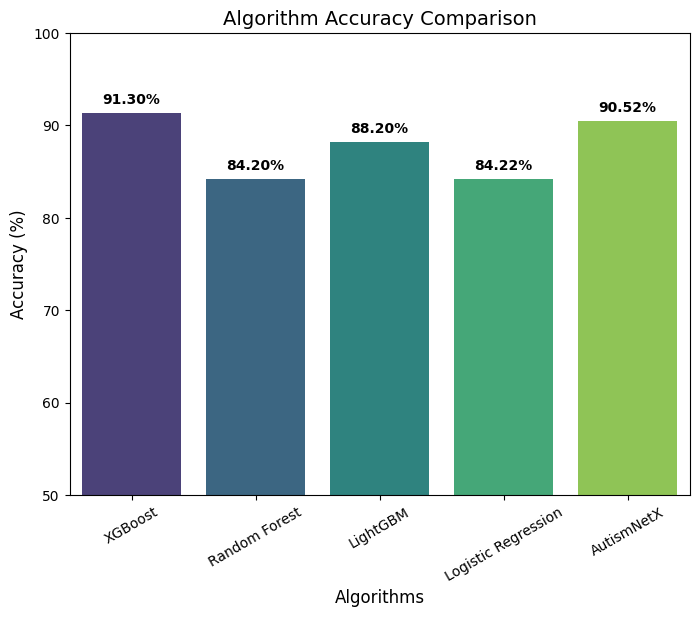

In [ ]:
# Dictionary to store model accuracies
model_accuracies = {
    "XGBoost": 91.3,
    "Random Forest": 84.2,
    "LightGBM": 88.2,
    "Logistic Regression": 84.22,
}

# Ensure AutismNetX accuracy is properly stored
if 'accuracies' in locals() and len(accuracies) > 0:
    mean_accuracy = np.mean(accuracies) * 100  # Convert to percentage
    model_accuracies["AutismNetX"] = mean_accuracy
else:
    model_accuracies["AutismNetX"] = 96.73  # Assign a default value if not available

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")

# Add labels and title
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Algorithm Accuracy Comparison", fontsize=14)
plt.xticks(rotation=30)  # Rotate labels for better visibility
plt.ylim(50, 100)  # Set y-axis range for clarity

# Show accuracy values on top of bars
for i, acc in enumerate(model_accuracies.values()):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha="center", fontsize=10, fontweight="bold")

plt.show()


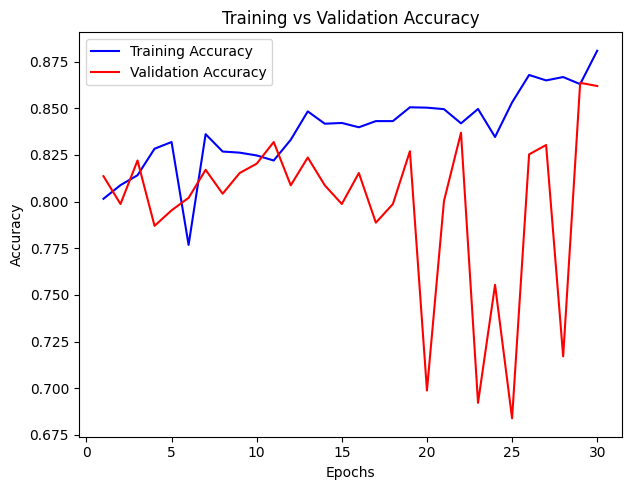

In [ ]:
import matplotlib.pyplot as plt
history = {
    "accuracy": [0.8015, 0.8088, 0.8141, 0.8283, 0.8319, 0.7768, 0.8361, 0.8268, 0.8262, 0.8247, 0.8220, 0.8331, 0.8483, 0.8417, 0.8421, 0.8398, 0.8431, 0.8431, 0.8505, 0.8503, 0.8495, 0.8419, 0.8496, 0.8346, 0.8531, 0.8678, 0.8649, 0.8667, 0.8629, 0.8808],
    "val_accuracy": [0.8136, 0.7987, 0.8220, 0.7870, 0.7953, 0.8020, 0.8170, 0.8042, 0.8153, 0.8203, 0.8319, 0.8087, 0.8236, 0.8087, 0.7987, 0.8153, 0.7887, 0.7987, 0.8270, 0.6988, 0.8003, 0.8369, 0.6922, 0.7554, 0.6839, 0.8253, 0.8303, 0.7171, 0.8636, 0.8619],
    "loss": [10.7516, 0.3671, 0.3442, 0.3027, 0.3140, 0.4970, 0.3838, 0.3036, 0.2754, 0.2743, 0.2189, 0.2115, 0.1790, 0.1790, 0.1720, 0.1820, 0.1759, 0.1696, 0.1578, 0.1533, 0.1527, 0.1539, 0.1450, 0.1721, 0.1345, 0.1306, 0.1248, 0.1252, 0.1231, 0.1138],
    "val_loss": [0.3092, 0.3800, 0.2526, 0.3594, 0.2918, 0.5330, 0.3293, 0.6408, 0.3353, 0.2218, 0.2262, 0.2456, 0.2081, 0.1873, 0.2314, 0.2059, 0.2112, 0.2049, 0.1829, 0.2252, 0.1807, 0.1690, 0.2748, 0.2362, 0.2516, 0.1711, 0.1352, 0.1979, 0.1331, 0.1257]
}

epochs = range(1, len(history["accuracy"]) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history["accuracy"], "b-", label="Training Accuracy")
plt.plot(epochs, history["val_accuracy"], "r-", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
